# Analysis of Machine Learning Regression Models on Predicting Coronavirus Spread

Anish Mirjankar, 5/5/2020

The 2019 spread of Coronavirus, or COVID-19, is considered one of the largest pandemics in decades.  Data is being collected by local, state, and federal government agencies across the country, as well as countless private organizations, tracking testing and cases as they develop around the country.  I chose to use data from the COVID Tracking Project, an organization which maintains an api of all current and historical cases collected from the entire country.  

Some questions that I am looking to answer are:

1. Does this data suffice to train a model that can successfully predict the spread of COVID in an area given the historical data provided?
2. Can we predict the number of total cases in a given region based on the testing/hospitalization data, state information, and any other categorical parameters included?
3. Can this model predict certain outcomes based on the pre-processed, daily intake data provided by the API?
4. Which method of machine learning can generate the most succesful prediction/model of the coronavirus spread?

Data sources:

* [the COVID tracking Project](https://covidtracking.com)
* [United States Census](https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html)

In [1]:
import pandas as pd
links = {
    'curr_state': 'https://covidtracking.com/api/v1/states/current.csv',
    'hist_state': 'https://covidtracking.com/api/v1/states/daily.csv',
    'state_info': 'https://covidtracking.com/api/v1/states/info.csv',
    'curr_us': 'https://covidtracking.com/api/v1/us/current.csv',
    'hist_us': 'https://covidtracking.com/api/v1/us/daily.csv',
    'tracker': 'https://covidtracking.com/api/v1/urls.csv',
    'state_pages': 'https://covidtracking.com/api/v1/states/screenshots.csv',
    'state_pop':'https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/counties/totals/co-est2019-alldata.csv'
}

df_hist = pd.read_csv(links['hist_state'])
df_hist

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200505,AK,371.0,22321.0,NaN,13.0,NaN,NaN,NaN,NaN,...,NaN,22692,22692,22692,2,0.0,0.0,968.0,1.0,969.0
1,20200505,AL,8285.0,98481.0,NaN,NaN,1107.0,NaN,428.0,NaN,...,1107.0,106766,106766,106766,1,17.0,43.0,3389.0,260.0,3649.0
2,20200505,AR,3496.0,51139.0,NaN,89.0,453.0,NaN,NaN,16.0,...,453.0,54635,54635,54635,5,-1.0,15.0,155.0,38.0,193.0
3,20200505,AS,0.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,83,83,83,60,0.0,0.0,0.0,0.0,0.0
4,20200505,AZ,9305.0,78955.0,NaN,728.0,1397.0,303.0,NaN,185.0,...,1397.0,88260,88260,88260,4,33.0,40.0,2621.0,386.0,3007.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3428,20200126,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,53,0.0,0.0,0.0,0.0,0.0
3429,20200125,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,53,0.0,0.0,0.0,0.0,0.0
3430,20200124,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,53,0.0,0.0,0.0,0.0,0.0
3431,20200123,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,1,1,53,0.0,0.0,0.0,0.0,0.0


## Data Cleanup & Pre-Processing

The data provided requires cleanup and pre-processing to be suitable for intake by a regression model. First, all categorical fields must either be dumped or converted to a integer/float.  

### Adding population data
This specific dataset highly requires differentiation between states, therefore the state name is converted to its index in a static list of states and their population data.  The two dataframes are joined to provide each region with its associated states population data.


In [2]:
import numpy as np

def generate_df(old):
    states_to_abb = {"Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR", "California": "CA", "Colorado": "CO", 
    "Connecticut": "CT", "Delaware": "DE", "Florida": "FL", "Georgia": "GA", "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL", 
    "Indiana": "IN", "Iowa": "IA", "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA", "Maine": "ME", "Maryland": "MD", 
    "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN", "Mississippi": "MS", "Missouri": "MO", "Montana": "MT", 
    "Nebraska": "NE", "Nevada": "NV", "New Hampshire": "NH", "New Jersey": "NJ", "New Mexico": "NM", "New York": "NY", 
    "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK", "Oregon": "OR", "Pennsylvania": "PA", 
    "Rhode Island": "RI", "South Carolina": "SC", "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT", 
    "Vermont": "VT", "Virginia": "VA", "Washington": "WA", "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY", 
    "District of Columbia": "DC"}

    df_states = pd.read_csv(links['state_pop'], encoding="latin-1")
    df_states["statecode"] = df_states['STNAME'].apply(lambda x: states_to_abb[x])

    df = pd.merge(old, df_states, left_on="state", right_on="statecode", how="left")
    df = df[df['statecode'].notna()]
    cols_to_retain = [k for k,v in df.dtypes.to_dict().items() if v in [np.float64, np.int64]]
    # cleanup non-numerical columns
    df = df[cols_to_retain]
    return df
df = generate_df(df_hist)
df

,date,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,20200505,371.0,22321.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,...,-12.929847,0.587728,1.416798,-0.955359,-11.460949,-7.997118,-3.897349,-10.992765,-13.859140,-12.031221
1,20200505,371.0,22321.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,...,-30.600119,24.591440,7.324889,12.053639,-2.690985,6.846257,-4.156770,26.400704,-20.729927,-17.825312
2,20200505,371.0,22321.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,...,-16.143339,-0.538551,14.389767,13.097005,3.793430,-9.997414,-16.541877,1.399335,-20.582285,-6.741174
3,20200505,371.0,22321.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,...,-17.188659,-1.387574,-3.485563,-0.647317,-15.024083,-18.026915,-10.615404,-18.607576,-20.702426,-15.930277
4,20200505,371.0,22321.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,...,-4.808086,-1.507115,-3.307199,-8.955728,-15.032972,-15.491349,-13.786586,-12.128932,-7.326007,-4.698812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198955,20200122,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.645400,7.272727,8.008008,11.202390,6.933267,1.735681,41.300098,26.153115,37.387491,19.543974
198956,20200122,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.109166,6.049392,-4.832748,-1.297498,0.740298,5.776862,0.133400,7.915699,1.370462,1.861998
198957,20200122,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.585832,5.392127,3.041486,2.662215,6.836831,13.619372,18.208863,20.473840,14.540748,15.359428
198958,20200122,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.425166,1.357788,29.032927,-1.798234,-0.789670,22.317579,10.186827,8.451622,3.856054,5.451612


In [3]:
print(list(df.columns))

['date', 'positive', 'negative', 'pending', 'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently', 'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative', 'recovered', 'death', 'hospitalized', 'total', 'totalTestResults', 'posNeg', 'fips', 'deathIncrease', 'hospitalizedIncrease', 'negativeIncrease', 'positiveIncrease', 'totalTestResultsIncrease', 'SUMLEV', 'REGION', 'DIVISION', 'STATE', 'COUNTY', 'CENSUS2010POP', 'ESTIMATESBASE2010', 'POPESTIMATE2010', 'POPESTIMATE2011', 'POPESTIMATE2012', 'POPESTIMATE2013', 'POPESTIMATE2014', 'POPESTIMATE2015', 'POPESTIMATE2016', 'POPESTIMATE2017', 'POPESTIMATE2018', 'POPESTIMATE2019', 'NPOPCHG_2010', 'NPOPCHG_2011', 'NPOPCHG_2012', 'NPOPCHG_2013', 'NPOPCHG_2014', 'NPOPCHG_2015', 'NPOPCHG_2016', 'NPOPCHG_2017', 'NPOPCHG_2018', 'NPOPCHG_2019', 'BIRTHS2010', 'BIRTHS2011', 'BIRTHS2012', 'BIRTHS2013', 'BIRTHS2014', 'BIRTHS2015', 'BIRTHS2016', 'BIRTHS2017', 'BIRTHS2018', 'BIRTHS2019', 'DEATHS2010', 'DEATHS2011', 'DEATHS2012', 'D

## Model training

The following n-fold cross validation function is used to accurately train and test each algorithm and its validity.  It will be used to compare the algorithm on a subset of metrics, including MAE, MSE, and RMSE.

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

def n_fold_cross_validation(dataset, class_name, n_splits=5, metrics={}, **kwargs):
    """
    dataset = dataset to split
    class_name = results class column name
    n_splits = number of splits to use
    metrics = list of metrics to include
    kwargs = dict of estimators to use (pass as name=MLClass)
    """
    results = {k:{m:0 for m, _ in metrics.items()} for k, _ in kwargs.items()}
    split_data = np.array_split(dataset.sample(frac=1), n_splits)
    print(results)
    for i, testing in enumerate(split_data):        
        print(f"\nIteration {i+1}: ")
        # creating tr_attributes, tr_class, te_attributes, te_class = training and testing frames
        training = pd.concat([df for j, df in enumerate(split_data) if j != i])

        # fill unknown results - mean for numerical data and most frequent for categorical data
        training = training.fillna(training.mean())
        testing = testing.fillna(testing.mean())

        tr_attributes, tr_class = training.drop(columns=class_name).to_numpy(), training[class_name].to_numpy()
        te_attributes, te_class = testing.drop(columns=class_name).to_numpy(), testing[class_name].to_numpy()
        
        for j, (name, model) in enumerate(kwargs.items()):
            start_time = dt.datetime.now()
            model = model.fit(tr_attributes, tr_class)
            tr_time = dt.datetime.now()
            
            # for seeing the results in original dataset
            #testing["prediction"] = model.predict(te_attributes)
            #print(testing)
            
            for k, func in metrics.items():
                results[name][k] += func(model.predict(te_attributes), te_class)
            end_time = dt.datetime.now()
            print(f"Training time for {name}: {tr_time-start_time}s \nTesting time for {name}: {end_time-tr_time}s")
        
    # divide summed metrics by number of splits to find final average
    for k, v  in results.items():
        results[k] = {met_name:met_data/n_splits for met_name, met_data in v.items()}

    return results

## Model tuning

In order to properly tune each model for the use case at hand, the below implementations were created.  All models can then be compared by their results from the n-fold cross validation function above.  The following regression models were selected due to their individual characteristics:

* Linear Regression Model
* Decision Tree Regressor
* MLP Regressor
* Support Vector Regressor

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn import metrics

linear = LinearRegression()
dtree = DecisionTreeRegressor()
mlp = MLPRegressor()
svm = SVR()

results = n_fold_cross_validation(
    df,
    metrics={
        'mae':metrics.mean_absolute_error, 
        'mse':metrics.mean_squared_error, 
        'rmse': lambda x,y: np.sqrt(metrics.mean_absolute_error(x, y))
    },
    n_splits=5,
    class_name="hospitalizedIncrease",
    lin=linear,
    dtree=dtree,
)

{'lin': {'mae': 0, 'mse': 0, 'rmse': 0}, 'dtree': {'mae': 0, 'mse': 0, 'rmse': 0}}

Iteration 1: 
Training time for lin: 0:00:03.041407s 
Testing time for lin: 0:00:00.056997s
Training time for dtree: 0:00:21.818264s 
Testing time for dtree: 0:00:00.132025s

Iteration 2: 
Training time for lin: 0:00:02.814696s 
Testing time for lin: 0:00:00.048519s
Training time for dtree: 0:00:22.342130s 
Testing time for dtree: 0:00:00.146007s

Iteration 3: 
Training time for lin: 0:00:02.955501s 
Testing time for lin: 0:00:00.059063s
Training time for dtree: 0:00:25.652770s 
Testing time for dtree: 0:00:00.169519s

Iteration 4: 
Training time for lin: 0:00:03.031510s 
Testing time for lin: 0:00:00.054002s
Training time for dtree: 0:00:25.211007s 
Testing time for dtree: 0:00:00.144831s

Iteration 5: 
Training time for lin: 0:00:03.623542s 
Testing time for lin: 0:00:00.071005s
Training time for dtree: 0:00:26.943555s 
Testing time for dtree: 0:00:00.151003s


## Analysis

Analysis was performed on each model to determine the validity and accuracy of the model, as well as the training time and prediction time.

### Runtime

* Linear Regression
* MLP - Eliminated for runtime constraints.
* Decision Tree Regression
* SVM Regression - Eliminated for runtime constraints.

### Model metrics

The linear regression performed the calculation with an RMSE of 6.83, compared to 6.98 of the decision tree implementation.  These two proved the most comparable in terms of accuracy and runtime. 

lin : {'mae': 46.654293021122356, 'mse': 12193.496818283751, 'rmse': 6.830164991274373}
dtree : {'mae': 95.49537387374498, 'mse': 79046.26628628402, 'rmse': 9.419645386024296}


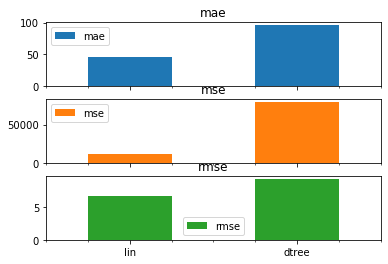

In [6]:
import matplotlib.pyplot as plt

resdf = pd.DataFrame.from_dict(results, orient="index")

axes = resdf.plot.bar(rot=0, subplots=True)
_ = [print(k,":",v) for k,v in results.items()]


# Conclusion

The questions proposed in the introduction are answered below:

1. Does this data suffice to train a model that can successfully predict the spread of COVID in an area given the historical data provided?
    
        Yes, several models were used, several of which trained to make a prediction within the scope of the project.  
        Each model was measured by its Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error.

2. Can we predict the number of total cases in a given region based on the testing/hospitalization data, state information, and any other categorical parameters included?

        Yes, we can accurately predict the number of cases or the increase in a region given state population and growth 
        and the given testing and hospitalization data.

3. Can this model predict certain outcomes based on the pre-processed, daily intake data provided by the API?

        Yes, the linear and decision tree model can't generate a prediction based on the value from current state data,
        but significant preprocessing is required to prepare the input data for prediction.

4. Which method of machine learning can generate the most succesful prediction/model of the coronavirus spread?

        A linear regression model most successfuly models the data with the least error, and quickest runtime.

In [7]:
test_df = pd.read_csv(links['curr_state'])
clean_df = generate_df(test_df).fillna(test_df.mean())
print(df.columns)
print(clean_df.columns)
clean_df['lin_pred'] = linear.predict(clean_df.to_numpy())
clean_df['dtree_pred'] = dtree.predict(clean_df.to_numpy())


Index(['date', 'positive', 'negative', 'pending', 'hospitalizedCurrently',
       'hospitalizedCumulative', 'inIcuCurrently', 'inIcuCumulative',
       'onVentilatorCurrently', 'onVentilatorCumulative',
       ...
       'RDOMESTICMIG2019', 'RNETMIG2011', 'RNETMIG2012', 'RNETMIG2013',
       'RNETMIG2014', 'RNETMIG2015', 'RNETMIG2016', 'RNETMIG2017',
       'RNETMIG2018', 'RNETMIG2019'],
      dtype='object', length=184)
Index(['positive', 'positiveScore', 'negativeScore', 'negativeRegularScore',
       'commercialScore', 'score', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative',
       ...
       'RDOMESTICMIG2019', 'RNETMIG2011', 'RNETMIG2012', 'RNETMIG2013',
       'RNETMIG2014', 'RNETMIG2015', 'RNETMIG2016', 'RNETMIG2017',
       'RNETMIG2018', 'RNETMIG2019'],
      dtype='object', length=183)


ValueError: Number of features of the model must match the input. Model n_features is 183 and input n_features is 184 